In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
# Reading the dataset
df = pd.read_csv("/home/sam/Desktop/supervised_rnn/RNN/dataset/supervised_rnn_data.csv")

In [4]:
df.dropna(axis=0, how='any', inplace=True)
df.head()

,0,1,2,3,state,user_id
0,0.3352,0.318315,0.324058,0.931736,A,0
1,0.3352,0.318315,0.324058,0.931736,A,0
2,0.3352,0.318315,0.324058,0.931736,A,0
3,0.3352,0.318315,0.324058,0.931736,A,0
4,0.3352,0.318315,0.324058,0.931736,A,0


In [5]:
print("Dataset shape " + str(df.shape))

Dataset shape (99720, 6)


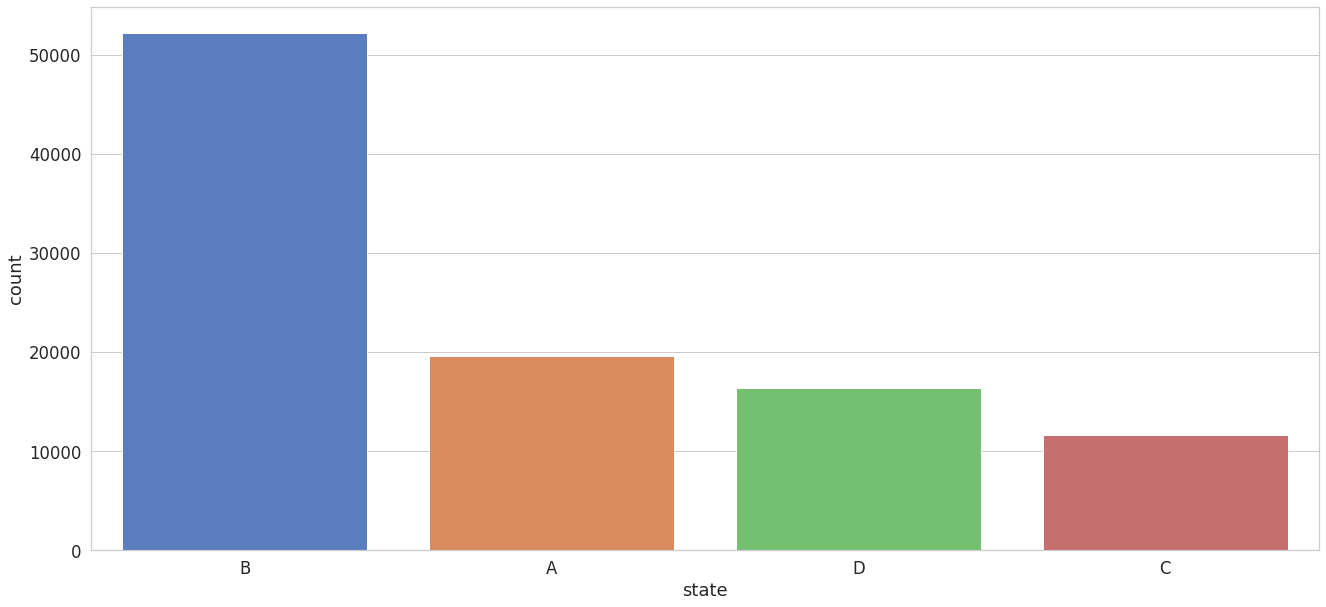

In [6]:
sns.countplot(x = 'state',
              data = df,
              order = df.state.value_counts().index);

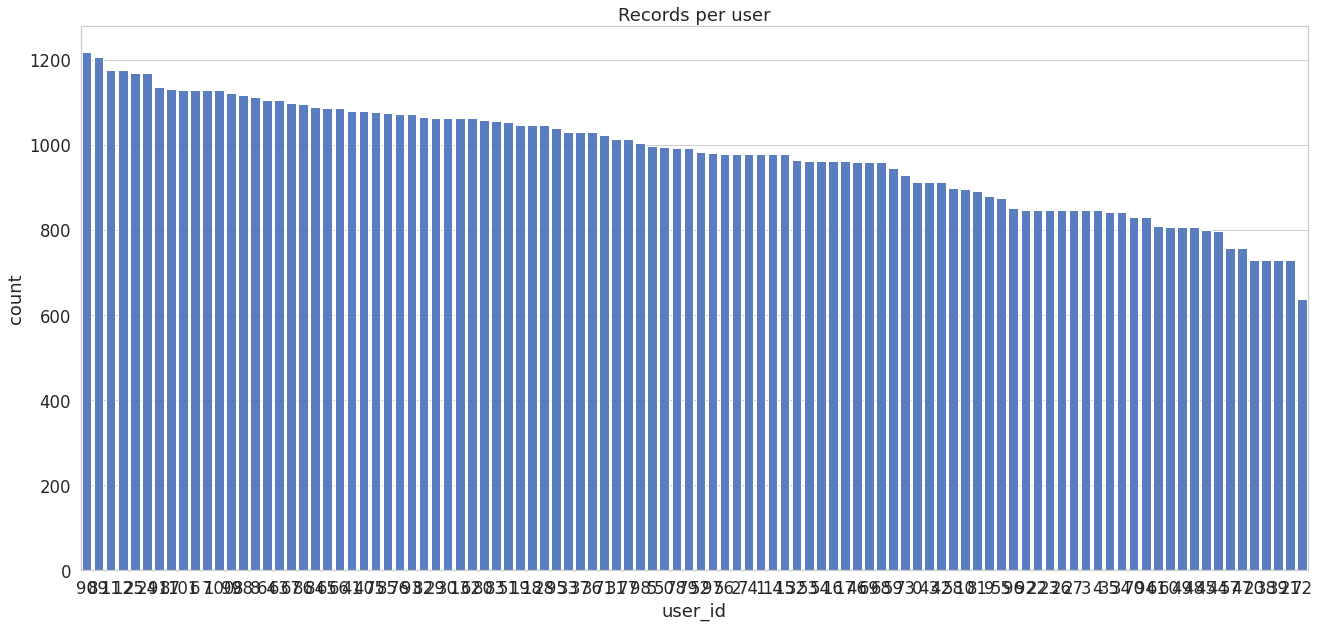

In [7]:
sns.countplot(x = 'user_id',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.user_id.value_counts().index);
plt.title("Records per user");

In [8]:
def plot_state_breakDown(state, df):
    data = df[df['state'] == state][['0', '1', '2','3']][:119]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=state)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/

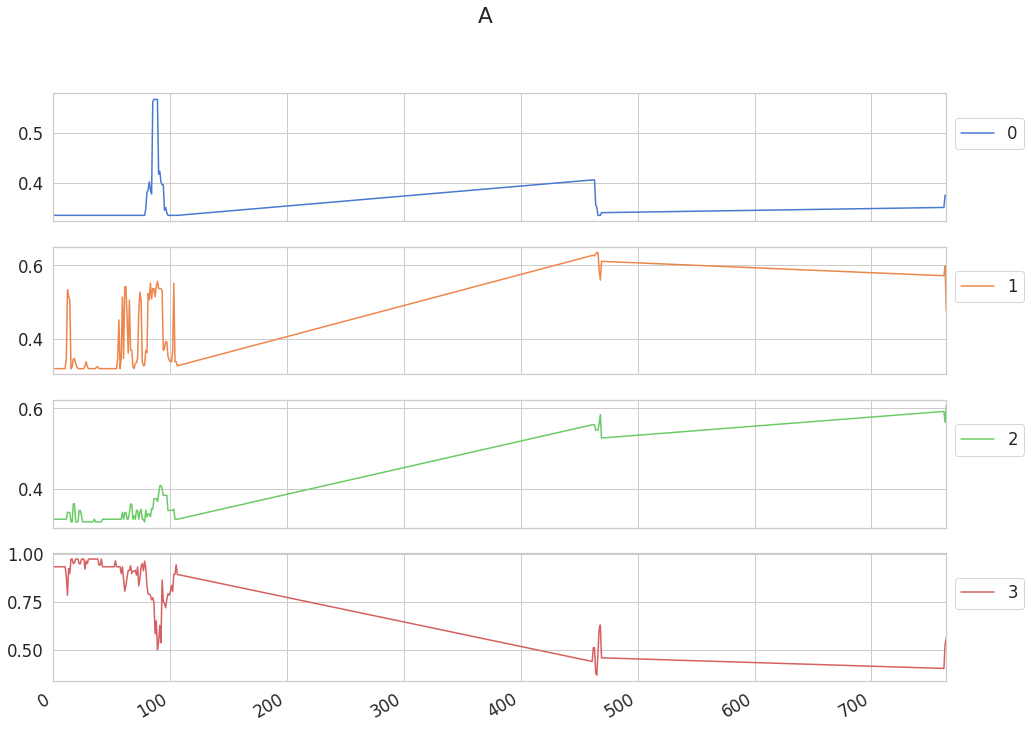

In [9]:
plot_state_breakDown("A", df);

/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/

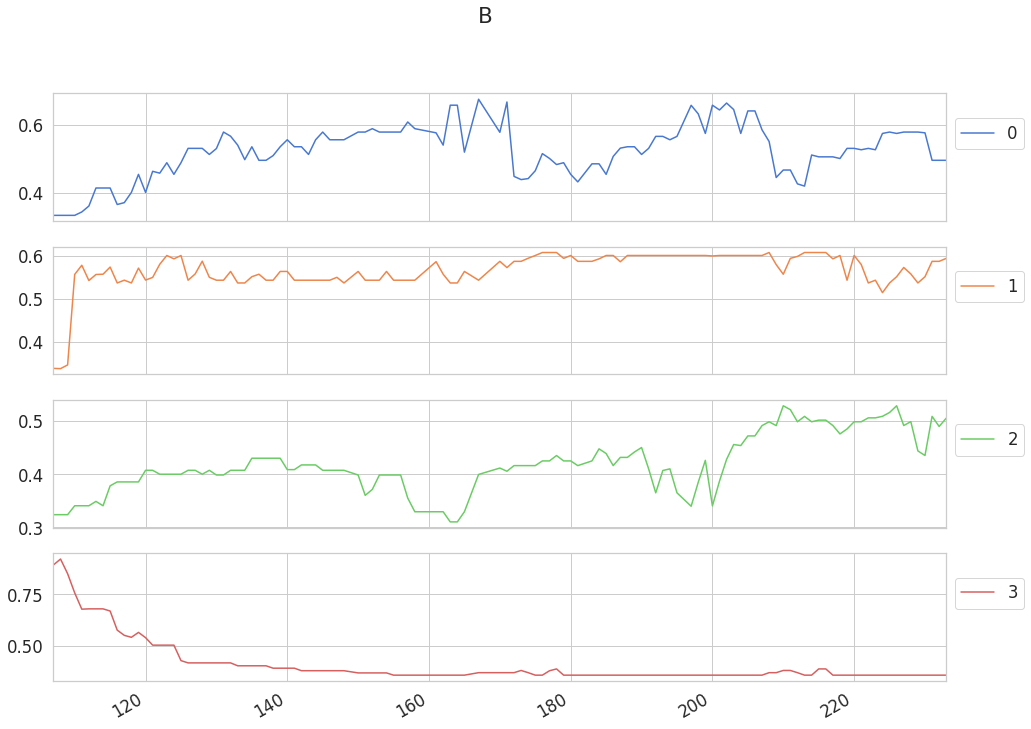

In [10]:
plot_state_breakDown("B", df);

/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/

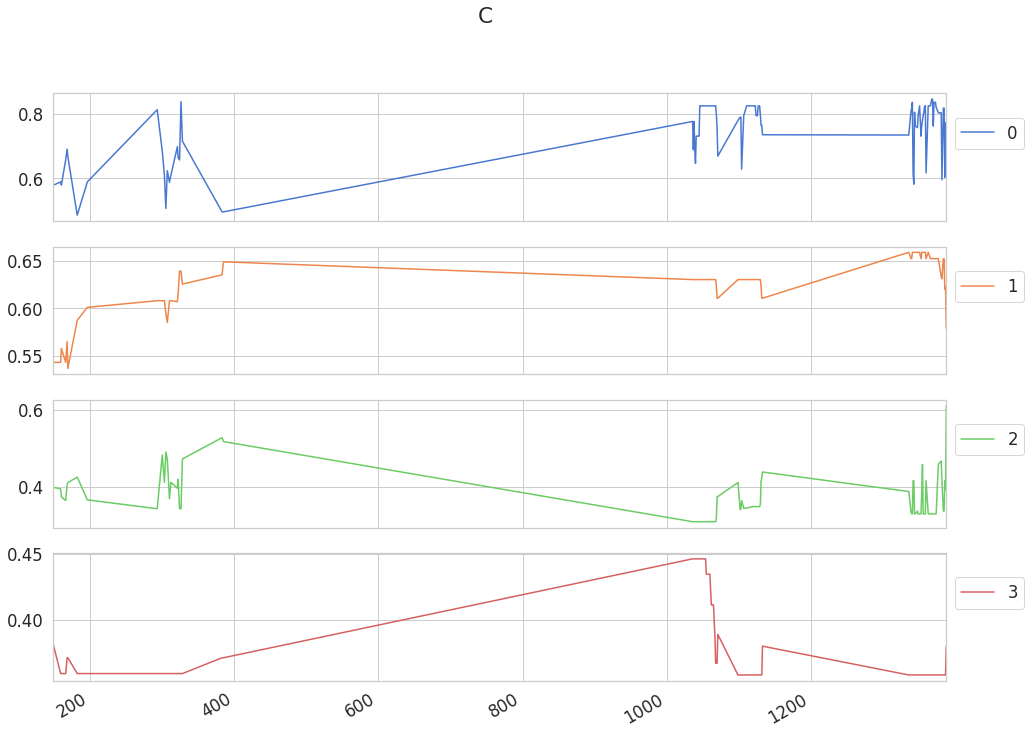

In [11]:
plot_state_breakDown("C", df);

/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/

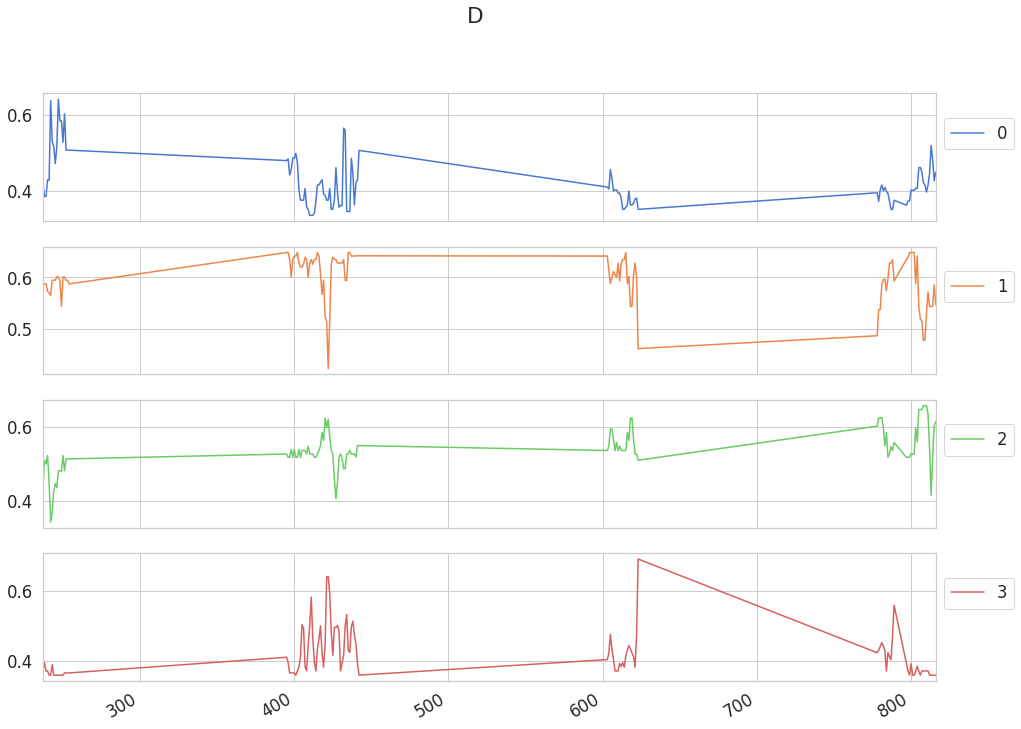

In [12]:
plot_state_breakDown("D", df);

In [13]:
df_train = df[df['user_id'] <= 30]
df_test = df[df['user_id'] > 30]

In [14]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['0', '1', '2', '3']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/sam/.virtualenvs/GRU/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 119
STEP = 40

X_train, y_train = create_dataset(
    df_train[['0', '1', '2', '3']], 
    df_train.state, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['0', '1', '2', '3']], 
    df_test.state, 
    TIME_STEPS, 
    STEP
)

In [16]:
print(X_train.shape, y_train.shape)

(758, 119, 4) (758, 1)


In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [18]:
print(X_train.shape, y_train.shape)

(758, 119, 4) (758, 4)


In [19]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)




model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

1 Physical GPUs, 1 Logical GPUs


In [22]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=1000,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/200
1/1 [==============================] - 0s 80ms/step - loss: 1.1330 - acc: 0.6818 - val_loss: 1.0963 - val_acc: 0.7500
Epoch 2/200
1/1 [==============================] - 0s 60ms/step - loss: 1.0597 - acc: 0.7273 - val_loss: 1.0215 - val_acc: 0.8026
Epoch 3/200
1/1 [==============================] - 0s 63ms/step - loss: 0.9972 - acc: 0.7331 - val_loss: 0.9403 - val_acc: 0.8421
Epoch 4/200
1/1 [==============================] - 0s 61ms/step - loss: 0.9303 - acc: 0.7434 - val_loss: 0.8489 - val_acc: 0.8816
Epoch 5/200
1/1 [==============================] - 0s 59ms/step - loss: 0.8722 - acc: 0.7551 - val_loss: 0.7476 - val_acc: 0.8816
Epoch 6/200
1/1 [==============================] - 0s 59ms/step - loss: 0.8206 - acc: 0.7507 - val_loss: 0.6485 - val_acc: 0.8816
Epoch 7/200
1/1 [==============================] - 0s 59ms/step - loss: 0.7939 - acc: 0.7566 - val_loss: 0.5869 - val_acc: 0.8553
Epoch 8/200
1/1 [==============================] - 0s 57ms/step - loss: 0.7611 - acc: 0.76

1/1 [==============================] - 0s 61ms/step - loss: 0.4782 - acc: 0.8109 - val_loss: 0.3797 - val_acc: 0.8947
Epoch 64/200
1/1 [==============================] - 0s 56ms/step - loss: 0.4711 - acc: 0.8240 - val_loss: 0.3673 - val_acc: 0.9079
Epoch 65/200
1/1 [==============================] - 0s 59ms/step - loss: 0.4648 - acc: 0.8270 - val_loss: 0.3690 - val_acc: 0.9079
Epoch 66/200
1/1 [==============================] - 0s 57ms/step - loss: 0.4609 - acc: 0.8240 - val_loss: 0.3765 - val_acc: 0.9079
Epoch 67/200
1/1 [==============================] - 0s 57ms/step - loss: 0.4643 - acc: 0.8284 - val_loss: 0.3817 - val_acc: 0.8947
Epoch 68/200
1/1 [==============================] - 0s 56ms/step - loss: 0.4615 - acc: 0.8270 - val_loss: 0.3873 - val_acc: 0.8947
Epoch 69/200
1/1 [==============================] - 0s 58ms/step - loss: 0.4653 - acc: 0.8284 - val_loss: 0.3786 - val_acc: 0.9079
Epoch 70/200
1/1 [==============================] - 0s 56ms/step - loss: 0.4564 - acc: 0.8328 - 

1/1 [==============================] - 0s 62ms/step - loss: 0.3906 - acc: 0.8460 - val_loss: 0.3941 - val_acc: 0.8947
Epoch 126/200
1/1 [==============================] - 0s 61ms/step - loss: 0.3912 - acc: 0.8504 - val_loss: 0.3881 - val_acc: 0.8816
Epoch 127/200
1/1 [==============================] - 0s 59ms/step - loss: 0.3856 - acc: 0.8446 - val_loss: 0.3745 - val_acc: 0.8947
Epoch 128/200
1/1 [==============================] - 0s 57ms/step - loss: 0.4030 - acc: 0.8416 - val_loss: 0.3771 - val_acc: 0.8947
Epoch 129/200
1/1 [==============================] - 0s 58ms/step - loss: 0.3945 - acc: 0.8358 - val_loss: 0.3794 - val_acc: 0.8816
Epoch 130/200
1/1 [==============================] - 0s 59ms/step - loss: 0.3808 - acc: 0.8431 - val_loss: 0.3877 - val_acc: 0.8947
Epoch 131/200
1/1 [==============================] - 0s 58ms/step - loss: 0.4017 - acc: 0.8416 - val_loss: 0.3729 - val_acc: 0.8947
Epoch 132/200
1/1 [==============================] - 0s 58ms/step - loss: 0.3897 - acc: 0.

Epoch 187/200
1/1 [==============================] - 0s 57ms/step - loss: 0.3794 - acc: 0.8622 - val_loss: 0.4529 - val_acc: 0.8684
Epoch 188/200
1/1 [==============================] - 0s 58ms/step - loss: 0.3720 - acc: 0.8666 - val_loss: 0.4716 - val_acc: 0.8553
Epoch 189/200
1/1 [==============================] - 0s 56ms/step - loss: 0.3804 - acc: 0.8548 - val_loss: 0.5190 - val_acc: 0.8553
Epoch 190/200
1/1 [==============================] - 0s 59ms/step - loss: 0.3907 - acc: 0.8548 - val_loss: 0.4840 - val_acc: 0.8816
Epoch 191/200
1/1 [==============================] - 0s 58ms/step - loss: 0.3733 - acc: 0.8563 - val_loss: 0.4366 - val_acc: 0.8947
Epoch 192/200
1/1 [==============================] - 0s 57ms/step - loss: 0.3730 - acc: 0.8666 - val_loss: 0.4199 - val_acc: 0.8947
Epoch 193/200
1/1 [==============================] - 0s 57ms/step - loss: 0.3909 - acc: 0.8504 - val_loss: 0.4145 - val_acc: 0.8816
Epoch 194/200
1/1 [==============================] - 0s 56ms/step - loss: 0.

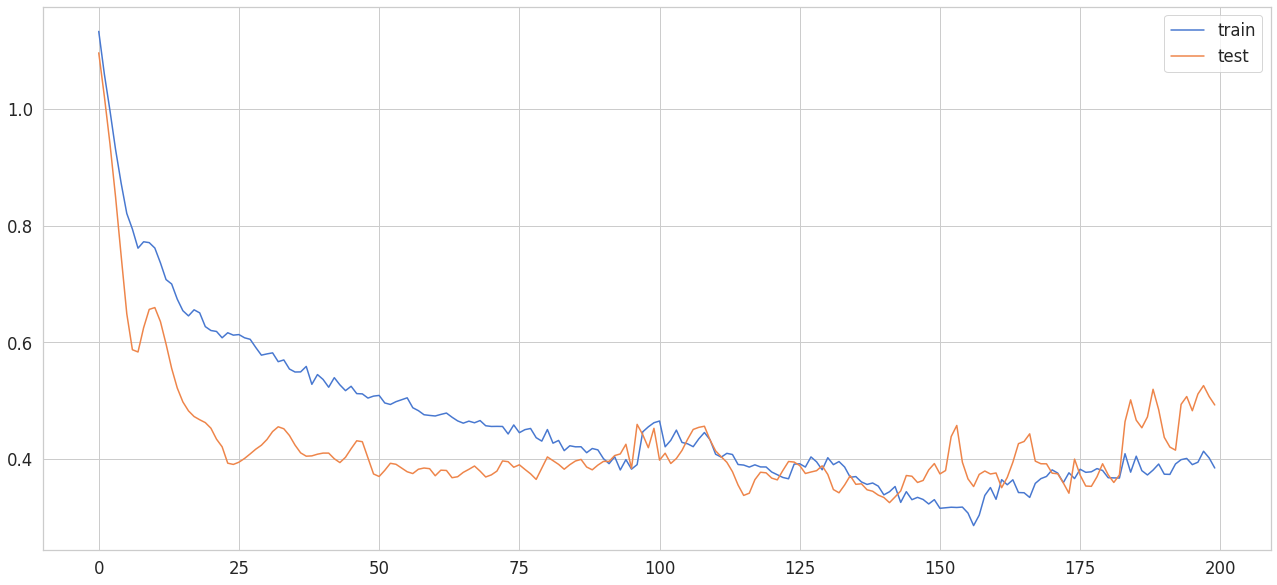

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [24]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 5ms/step - loss: 1.3903 - acc: 0.6873


[1.390347957611084, 0.6872832179069519]

In [27]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

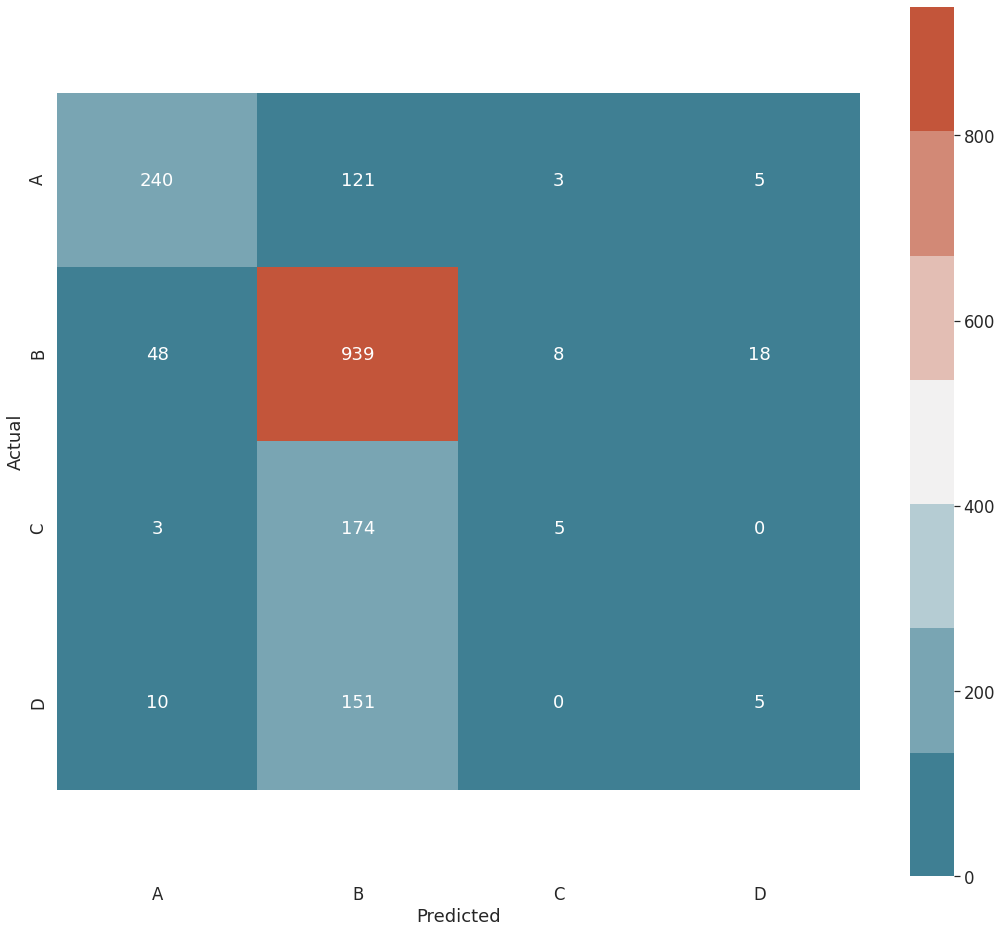

In [28]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)